Loading the dataset and required Libraries............

In [1]:
import pickle
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.feature_selection import RFE
from scipy.stats.mstats import winsorize
from sklearn.linear_model import LinearRegression
import xgboost
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
warnings.filterwarnings("ignore")
cars = pd.read_csv(r'C:\Users\HP\Documents\CSV files\toyota.csv')
cars

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,GT86,2016,16000,Manual,24089,Petrol,265,36.2,2.0
1,GT86,2017,15995,Manual,18615,Petrol,145,36.2,2.0
2,GT86,2015,13998,Manual,27469,Petrol,265,36.2,2.0
3,GT86,2017,18998,Manual,14736,Petrol,150,36.2,2.0
4,GT86,2017,17498,Manual,36284,Petrol,145,36.2,2.0
...,...,...,...,...,...,...,...,...,...
6733,IQ,2011,5500,Automatic,30000,Petrol,20,58.9,1.0
6734,Urban Cruiser,2011,4985,Manual,36154,Petrol,125,50.4,1.3
6735,Urban Cruiser,2012,4995,Manual,46000,Diesel,125,57.6,1.4
6736,Urban Cruiser,2011,3995,Manual,60700,Petrol,125,50.4,1.3


Getting information about the dataset............

In [2]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6738 entries, 0 to 6737
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         6738 non-null   object 
 1   year          6738 non-null   int64  
 2   price         6738 non-null   int64  
 3   transmission  6738 non-null   object 
 4   mileage       6738 non-null   int64  
 5   fuelType      6738 non-null   object 
 6   tax           6738 non-null   int64  
 7   mpg           6738 non-null   float64
 8   engineSize    6738 non-null   float64
dtypes: float64(2), int64(4), object(3)
memory usage: 473.9+ KB


The dataset has 6738 instances with 9 columns, there are no missing or null values in each of the columns. All columns in the dataset corresponds to their respective datatypes.


Checking for duplicate values......

In [3]:
duplicated = cars.duplicated().sum()
print('There are {} duplicated values'.format(duplicated))

There are 39 duplicated values


The dataset has 39 duplicated values, this is not much and can be safely removed from the dataset without affecting the dataset.

In [4]:
cars.drop_duplicates(inplace = True)

In [5]:
clean_df = cars.duplicated().sum()
print('There are {} duplicated values'.format(clean_df))

There are 0 duplicated values


All duplicated values in the dataset has been removed and there are no occurence of duplicated values

# Exploratory Data Analysis (EDA)

In [6]:
cars.describe()

,year,price,mileage,tax,mpg,engineSize
count,6699.000000,6699.000000,6699.000000,6699.000000,6699.000000,6699.000000
mean,2016.742797,12529.799074,22889.588745,94.549933,63.078728,1.471996
std,2.205271,6358.562625,19109.288501,73.942649,15.861037,0.435624
min,1998.000000,850.000000,2.000000,0.000000,2.800000,0.000000
25%,2016.000000,8266.500000,9488.500000,0.000000,55.400000,1.000000
50%,2017.000000,10798.000000,18571.000000,135.000000,62.800000,1.500000
75%,2018.000000,14995.000000,31059.500000,145.000000,70.600000,1.800000
max,2020.000000,59995.000000,174419.000000,565.000000,235.000000,4.500000


The average price of a sold used car is 12529 dollars with a standard deviation of 6358. A car was sold for 59995 which is the highest amount a car was sold. The year column and engine size columns will be temporarily converted into a categorical column for the purpose of getting a better described summary statistics and better EDA. First a copy of the dataset will be created.  

In [7]:
#creating a copy of the dataset
cars_df = cars.copy()

In [8]:
#changing the datatypes of the 'year' and 'enginesize' columns of the copied dataset
cars_df[['year', 'engineSize']] = cars_df[['year', 'engineSize']].astype('category')

In [9]:
cars_df.describe(exclude = ['int', 'float'])

,model,year,transmission,fuelType,engineSize
count,6699,6699,6699,6699,6699.0
unique,18,23,4,4,16.0
top,Yaris,2017,Manual,Petrol,1.0
freq,2117,2015,3793,4058,2038.0


- The most popular model of used car is the Yaris model.
- The most sold used cars was manufactured in 2017.
- Most engine size are 1.0

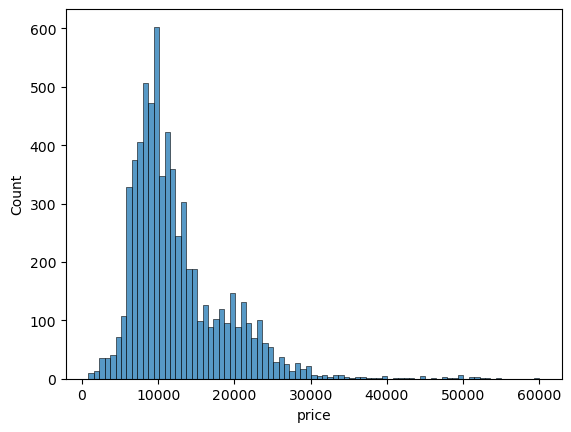

In [10]:
#Getting a histogram of the 'price' features of the dataset....
sns.histplot(data = cars_df , x = 'price')
plt.show()

The distribution of the price featrues seems to be right skewed with the presence of outliers.



Getting the price of used cars by the year it was manufactured......

<Axes: xlabel='year', ylabel='price'>

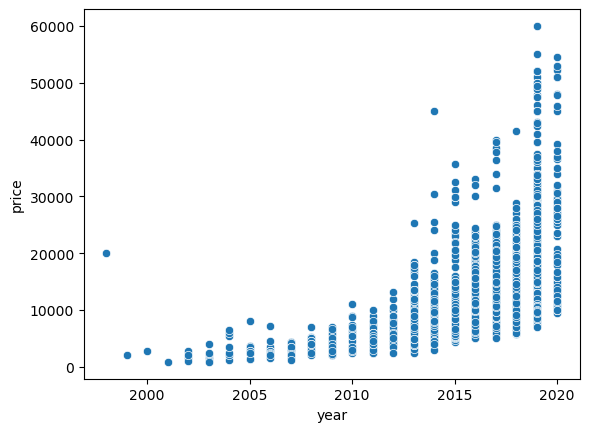

In [11]:
sns.scatterplot(cars_df, x = 'year', y = 'price')

From the scatterplot, it can be seen that recently manufacured used cars are sold for the highest amount.



Getting the price of used cars by the engine size it possesses......


<Axes: xlabel='engineSize', ylabel='price'>

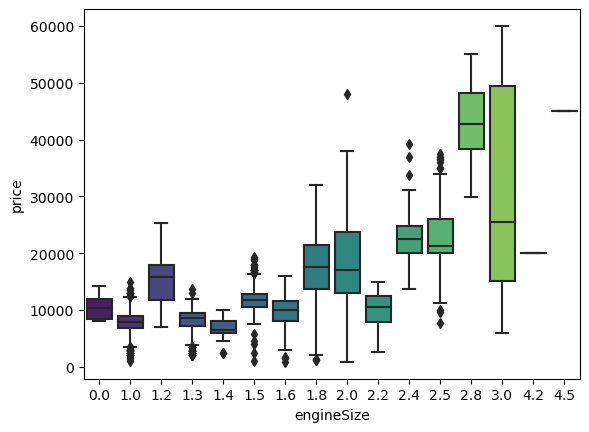

In [12]:
sns.boxplot(cars_df, x = 'engineSize', y = 'price', palette = 'viridis')

A trend can be seen as there is a positive correlation between price of sold cars and engine size.




Getting the scatterplot matrix and correation matrix of all the columns of the dataset...

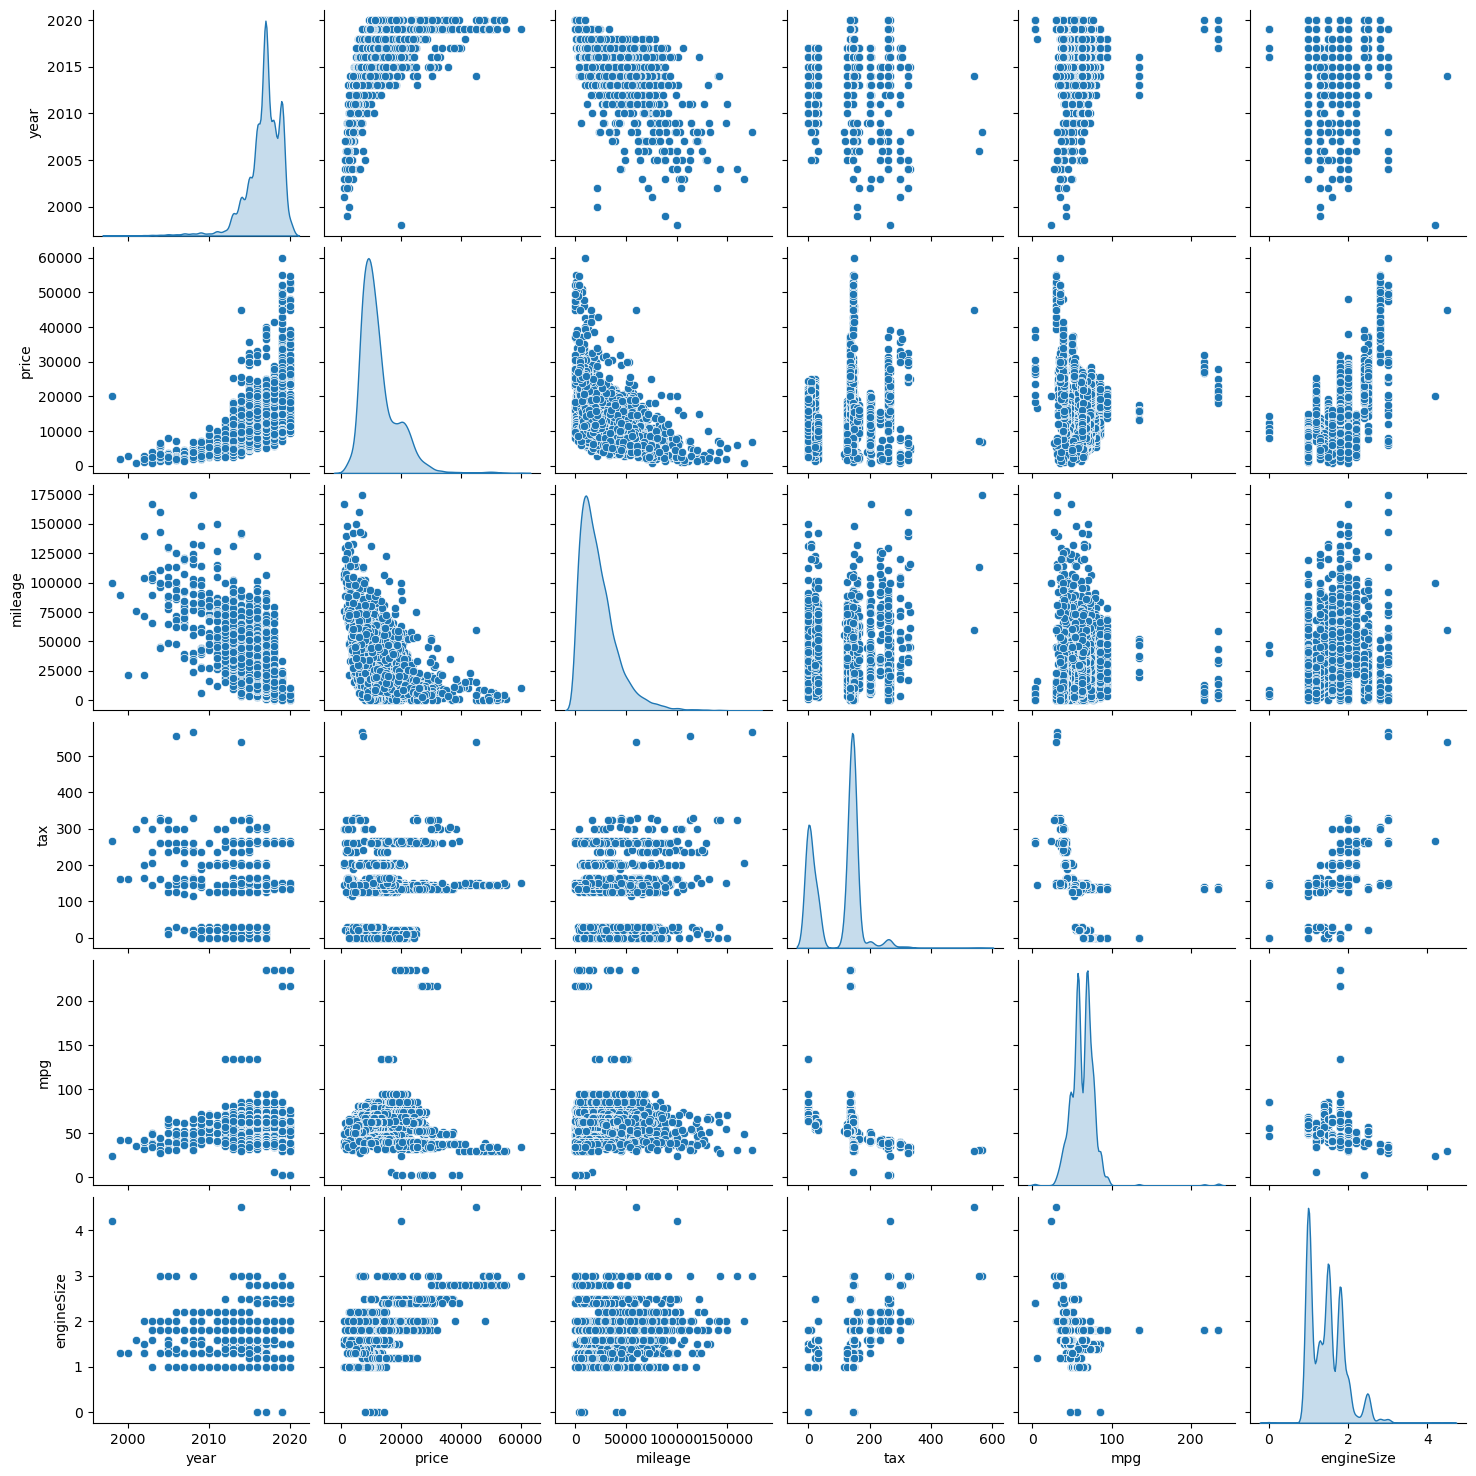

In [13]:
sns.pairplot(cars, diag_kind = 'kde')
plt.show()

<Axes: >

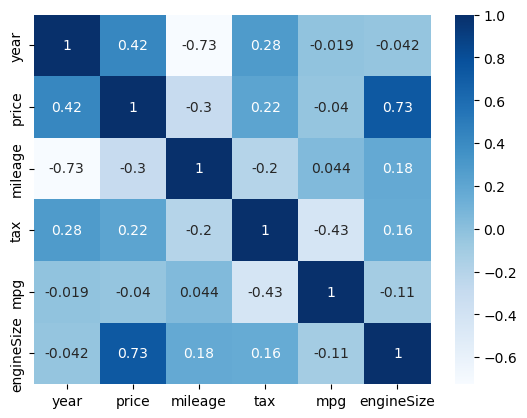

In [14]:
#Getting the correlation matrix of the dataset
sns.heatmap(cars.corr(), annot = True , cmap = 'Blues')

As can be seen, there is a huge positive correlation between price and enginesize, there is also a positive correlation between years and price. This makes sense as cars recently maufactured tends to be sold for higher prices than old cars. There is also a negative correlation between price and mileage.

# Outlier Detection

From the previous histogram of the price column of the dataset, there seems to be a huge number of outliers, this outliers wil be clipped to a particular range of values by using the 'Winsorization' technique. This would prevent the unnecessary loss of data.

In [15]:
winsorize(cars['price'], limits=[0.01, 0.01], inplace = True)

masked_array(data=[16000, 15995, 13998, ...,  4995,  3995,  4495],
             mask=False,
       fill_value=999999,
            dtype=int64)

<Axes: xlabel='price', ylabel='Count'>

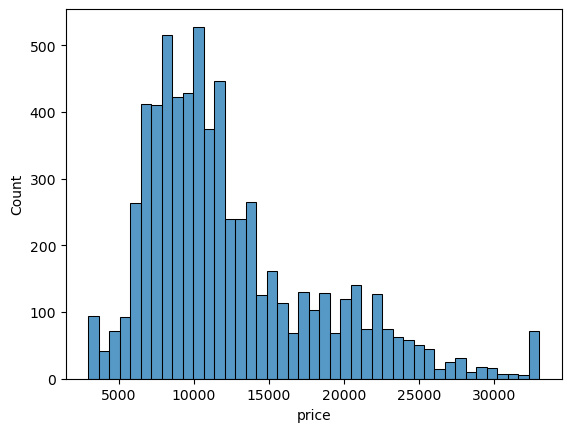

In [16]:
#Checking the histogram to confirm the winsorization 
sns.histplot(data = cars , x = 'price')

# Data Preprocessing

In this section, first the dataset is divided into features and target columns. Then all the categorical columns of the dataset will be dummy encoded. Then splitted into training and test sets for training and validating the data...

In [17]:
#Dividing the data into target and features columns where y represents the target feature "price"
X = cars.drop("price", axis = 1)
y= cars["price"]

In [18]:
X = pd.get_dummies(X, drop_first = True, columns = ['model', 'transmission', 'fuelType'])

In [19]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 105)

# Feature Selection

Important features necessary to predict the target variable which is 'price' are selected from the dataset. This will be done using the RFE algorithm.

RFE is an iterative process that works as follows:

- Train the model on all the features and rank them based on their importance.
- Eliminate the least important feature.
- Repeatedly train the model on the remaining features and eliminate the least significant feature until the desired number of features is reached.
- RFE considers the interaction between features and their impact on the model’s performance.

In [20]:
#Instantiating the random forest regressor model
rf = RandomForestRegressor()

In [21]:
selector= RFE(estimator= rf, n_features_to_select = 10)
selector.fit_transform(x_train, y_train)

array([[2.0160e+03, 2.6633e+04, 3.0000e+01, ..., 0.0000e+00, 0.0000e+00,
        1.0000e+00],
       [2.0170e+03, 2.3533e+04, 3.0000e+01, ..., 0.0000e+00, 0.0000e+00,
        1.0000e+00],
       [2.0190e+03, 3.2220e+03, 1.4500e+02, ..., 0.0000e+00, 0.0000e+00,
        1.0000e+00],
       ...,
       [2.0190e+03, 8.0060e+03, 1.4000e+02, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       [2.0190e+03, 3.2220e+03, 1.4500e+02, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       [2.0170e+03, 2.1779e+04, 1.4500e+02, ..., 0.0000e+00, 0.0000e+00,
        1.0000e+00]])

In [22]:
sel = X.columns[selector.get_support()]

In [23]:
print('The selected features are {}'.format(list(sel)))

The selected features are ['year', 'mileage', 'tax', 'mpg', 'engineSize', 'model_ Avensis', 'model_ C-HR', 'model_ Land Cruiser', 'model_ Prius', 'transmission_Manual']


# Data Modelling

In this section, a model will be created to predict the price of used cars. First, a baseline model, the linear regression model will be built to used to compare the final model. Performance metrics such as the root mean squared error and the mean absolute percentage error will be used to evaluate the performance of our model.


- MAPE(Mean absolute percentage error): Mean absolute percentage error measures the average magnitude of error produced by a model, or how far off predictions are on average. A MAPE value of 20% means that the average absolute percentage difference between the predictions and the actuals is 20%.
- RMSE(Root mean squared error): The RMSE is the square root of the variance of the residuals. It indicates the absolute fit of the model to the data–how close the observed data points are to the model's predicted values.
- R2 Score: This is a measure to show much of the variance of the dataset the model captures.

In [24]:
#Instantiating the linear regression model
lr = LinearRegression()

In [25]:
def modelling(model , xtrain , ytrain , xtest , ytest):
    # A function to train and validate the model using evaluation metrics
    model.fit(xtrain , ytrain)
    training_score = model.score(xtrain, ytrain)
    pred= model.predict(xtest)
    test_score = model.score(xtest, ytest)
    rmse = np.sqrt(mean_squared_error(pred, ytest))
    mape = np.sqrt(mean_absolute_percentage_error(pred, ytest))
    print('The r2 score for the training set is {}%'.format(round(training_score * 100), 4))
    print('The r2 score for the test set is {}%'.format(round(test_score * 100), 4))
    print('The RMSE of the model is {}'.format(round(rmse), 2))
    print('The MAPE of the model is {}%'.format(round((mape * 100), 2)))

In [26]:
baseline_model = modelling(lr , x_train[sel] , y_train , x_test[sel] , y_test)
baseline_model

The r2 score for the training set is 88%
The r2 score for the test set is 87%
The RMSE of the model is 2141
The MAPE of the model is 43.53%


The score for the training and test set are similar. This means our model didnt overfit or underfit. The RMSE is 2141 and MAPE is 43.53%. These met.




Now we build a random forest model.........

In [27]:
rf1 = RandomForestRegressor(random_state = 105)

In [28]:
rf_model = modelling(rf1 , x_train[sel] , y_train , x_test[sel] , y_test)
rf_model

The r2 score for the training set is 99%
The r2 score for the test set is 96%
The RMSE of the model is 1186
The MAPE of the model is 25.67%


The score for the training and test set are similar 99% for the training and 96% for the test dataset. This means our model didnt overfit or underfit. The RMSE is 1186 and MAPE is 25.67%



Next, we build another model using the xgboost algorithm.


XGBoost stands for “Extreme Gradient Boosting”. XGBoost is an optimized distributed gradient boosting library designed to be highly efficient, flexible and portable.Boosting is an ensemble learning technique to build a strong classifier from several weak classifiers in series.

In [29]:
model = xgboost.XGBRegressor()

In [30]:
xgb = modelling(model , x_train[sel] , y_train , x_test[sel] , y_test)
xgb

The r2 score for the training set is 99%
The r2 score for the test set is 96%
The RMSE of the model is 1120
The MAPE of the model is 24.85%


The score for the training and test set are similar 99% for the training and 96% for the test dataset. This means our model didnt overfit or underfit. The RMSE is 1120 and MAPE is 24.85%


The result of the xgboost model is almost similar to that of the random forest model. The xgboost model performed better in terms of the root mean squared error(RMSE) in the test dataset.

## Hyperaparameter Tuning


Hyperparameters are the variables that the user specify usually while building the Machine Learning model. thus, hyperparameters are specified before specifying the parameters or we can say that hyperparameters are used to evaluate optimal parameters of the model.

GridSearchCV (Grid Search Cross-Validation) is a technique used in machine learning to search and find the optimal combination of hyperparameters for a given model. It systematically explores a predefined set of hyperparameter values, creating a “grid” of possible combinations. It then evaluates each combination using cross-validation and selects the one that produces the best performance

In this section, we will conduct a grid search for the optimum parameters of our xgboost model. This optimum parameters will be applied to our models to make it perform more better. 

In [38]:
# Create the parameter grid based on the results of random search 
params = {'max_depth': [3, 6, 10],
              'learning_rate': [0.1, 0.3, 0.5],
              'subsample': np.arange(0.5, 1.0, 0.1),
              'n_estimators': [100, 200]
              }

In [39]:
grid = GridSearchCV(estimator = model, param_grid = params, 
                          cv = 3, n_jobs = -1)

In [40]:
grid.fit(x_train[sel], y_train)

GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None,
                                    predictor=None, random_state=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.3, 0.5],
                         'max_depth': [3, 6, 10], 'n_estimators': [100, 200],
                         'subsample': array([0.5, 0.6, 0.7, 0.8, 0.9])})

In [41]:
grid.best_estimator_

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

We have successfully conducted the hyperparameter tuning, now we use the hyperparameters and fit another random forest model. 

In [44]:
xgb_grid_model = modelling(grid.best_estimator_ , x_train[sel] , y_train , x_test[sel] , y_test)
xgb_grid_model

The r2 score for the training set is 98%
The r2 score for the test set is 97%
The RMSE of the model is 1046
The MAPE of the model is 24.28%


 The xgboost model with tuned hyperparameters performed better than all other models on all evaluation metrics althouth the r2 score for the training set was reduced. This is taken as our final model.
 

 
 
 
 ## Winner: 
 The xgboost model with these hyperparameters; base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None.

In [45]:
# Saving the model....
out = open(r'C:\Users\HP\Documents\CSV files\toyota_xgb.pkl', 'wb')
pickle.dump(grid, out)
out.close()